<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_Class_ajuste_Antoine_BFGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [2]:
def Minimo(x):
  A = x[0]
  B = x[1]
  C = x[2]
  P = [1,5,10,20,40,60,100,200,400,760]
  T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
  Num =10 # Num = len(P)
  Soma = 0

  for i in range(Num):
    TC = T[i]
    Pcal = np.exp(A + B/ (TC+273.15))
    Ptrue = P[i]
    Soma = Soma + (Ptrue-Pcal)**2

  return Soma

In [3]:
x0=np.array([5,5,10]) # initial guess of x
Resultado = minimize(Minimo, x0, method='BFGS',options={'gtol': 1e-10, 'disp': True})

         Current function value: 103.754841
         Iterations: 16
         Function evaluations: 414
         Gradient evaluations: 81


In [4]:
print('fun=',Resultado.fun)
print('resposta=',Resultado.x)

fun= 103.75484109248663
resposta= [   17.84618316 -3960.01801084    10.        ]


In [5]:
Resultado.x

array([   17.84618316, -3960.01801084,    10.        ])

In [6]:
w = Resultado.x
A = w[0]
B = w[1]
C = w[2]
Pcalc = []

# A, B, C = Resultado.x
P = [1,5,10,20,40,60,100,200,400,760]
T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
Num =10

for i in range(Num):
  TC =T[i]
  Pi = np.exp(A+B/(TC+C))
  Pcalc.append(Pi)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


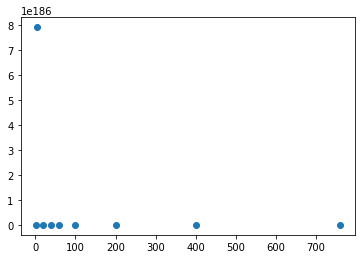

In [7]:
plt.scatter(P,Pcalc)